In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 4]

Let's tackle multiple variables now. The only difference now is in the cost function and gradient descent algorithms.

In [121]:
def load_data():
    x1 = np.arange(-10, 12, 2)
    x2 = x1 ** 2
    y = 4 * x2 - 5 * x1 + 10
    return np.array([
        x2, x1, y
    ]).T


## Load and plot data

In [122]:
df = load_data()
dfx = df[:, :2].T # converting to n X m dim
dfy = df[:, 2].reshape(1, 11) # 1 X m dim
params = np.random.rand(3, 1) # n X 1 dim

print(dfx, dfx.shape)
print(dfy, dfy.shape)

[[100  64  36  16   4   0   4  16  36  64 100]
 [-10  -8  -6  -4  -2   0   2   4   6   8  10]] (2, 11)
[[460 306 184  94  36  10  16  54 124 226 360]] (1, 11)


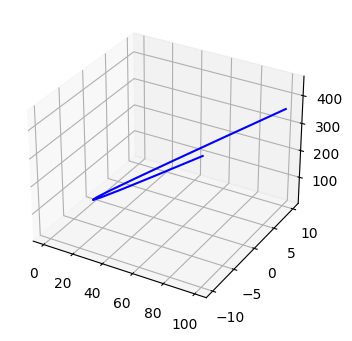

In [123]:
ax = plt.axes(projection='3d')
ax.plot3D(dfx[0], dfx[1], dfy[0], 'blue')

Let's try building the linear regression algo that learns the above **quadratic mapping**

In [124]:
# dfx -> n X m
# params -> n X 1
def predict(dfx, params):
    ws = params[:-1]
    b = params[-1]
    return np.matmul(ws.T, dfx) + b


In [125]:
# params = np.array([
#     [4],
#     [-5],
#     [10]
# ])
# print(dfx)
# print(predict(dfx, params))

In [126]:
def compute_cost(dfy, dfh):
    m = dfy.shape[1]
    return (1 / 2*m) * np.sum(np.square(dfy - dfh))

In [127]:
# x1 = np.array([
#     [1, 2],
#     [1, 1],
#     [3, 0]
# ])

# x2 = np.array([
#     [1],
#     [2],
#     [1]
# ])

# print(np.dot(x1.T, x2))
# print(np.matmul(x1.T, x2))

In [128]:
def grad_descent(dfx, dfy, dfh, params, alpha):
    diff = dfy - dfh
    m = dfy.shape[1]
    dW = (-1 / m) * np.matmul(dfx, diff.T)
    db = (-1 / m) * np.sum(diff)
    W = params[: -1]    
    b = params[-1].reshape(1, 1)
    W = W - (alpha * dW)
    b = b - (alpha * db)
    return np.concatenate((W, b), axis=0)


In [129]:
# z = predict(dfx, params)
# print(z.shape)
# print(z)

# t = grad_descent(dfx, dfy, z, params, 0.001)
# print(t.shape)
# print(t)

In [144]:
def train(dfx, dfy, params, alpha, runs):
    train_params = params
    train_details = []
    for i in range(runs):
        dfh = predict(dfx, train_params)
        cost = compute_cost(dfy, dfh)
        train_details.append({
            'cost': cost,
            'ws': train_params[:-1],
            'b': train_params[-1],
            'dfh': dfh
        })
        if i % 10000 == 0:
            print(f'Iteration: #{i + 1}: cost = {cost}, ws = {train_params[:-1]}, b = {train_params[-1]}')
        new_params = grad_descent(dfx, dfy, dfh, train_params, alpha)
        train_params = new_params
    y_cap = predict(dfx, train_params)
    cost = compute_cost(dfy, y_cap)
    train_details.append({
        'cost': cost,
        'ws': train_params[:-1],
        'b': train_params[-1],
        'dfh': y_cap
    })
    print(f'Training complete. cost = {cost}, ws = {train_params[:-1]}, b = {train_params[-1]}')
    return [train_params, train_details]

In [145]:
params = np.random.rand(3, 1) # n X 1 dim
train_params, train_details = train(dfx, dfy, params, 0.0001, 100000)

Iteration: #1: cost = 2570046.3843033696, ws = [[0.32975567]
 [0.69931415]], b = [0.70278151]
Iteration: #10001: cost = 943.1564991801779, ws = [[ 4.0837845]
 [-5.       ]], b = [4.03546094]
Iteration: #20001: cost = 392.6746516637217, ws = [[ 4.05406152]
 [-5.        ]], b = [6.15141184]
Iteration: #30001: cost = 163.4865286866587, ws = [[ 4.03488292]
 [-5.        ]], b = [7.51671828]
Iteration: #40001: cost = 68.06613299017397, ws = [[ 4.02250802]
 [-5.        ]], b = [8.39767524]
Iteration: #50001: cost = 28.33871694172505, ws = [[ 4.01452319]
 [-5.        ]], b = [8.96610818]
Iteration: #60001: cost = 11.798567696200719, ws = [[ 4.00937101]
 [-5.        ]], b = [9.33288662]
Iteration: #70001: cost = 4.912226618025097, ws = [[ 4.0060466]
 [-5.       ]], b = [9.56954852]
Iteration: #80001: cost = 2.0451609863304903, ws = [[ 4.00390154]
 [-5.        ]], b = [9.7222534]
Iteration: #90001: cost = 0.8514842219736949, ws = [[ 4.00251745]
 [-5.        ]], b = [9.82078543]
Training complete

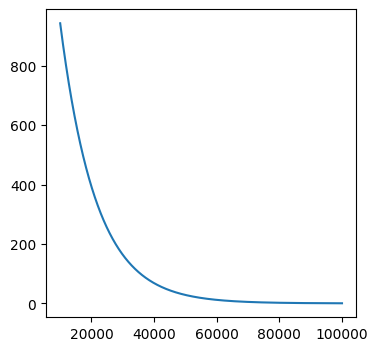

In [153]:
train_costs = [x['cost'] for x in train_details]
train_itr = np.arange(0, len(train_costs))
plt.plot(train_itr[10001:], train_costs[10001:]) # first 10,000 iterations have very high error rates

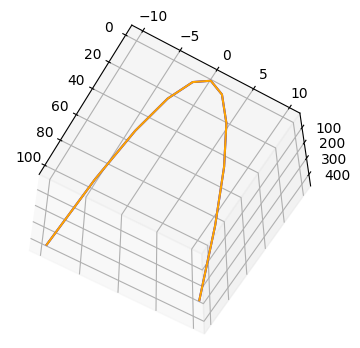

In [158]:
preds = predict(dfx, train_params)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(dfx[0], dfx[1], dfy[0], 'blue')
ax.plot3D(dfx[0], dfx[1], preds[0], 'orange')
ax.view_init(120, 30)

plt.show()

We were able to successfully learn the parameters for predicting the quadratic expression. This can be generalized to any number of variables!